In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('fivethirtyeight')

In [6]:
comments=pd.read_csv('../content/GBcomments.csv.zip',error_bad_lines=False)

<ipython-input-6-20508099e68d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  comments=pd.read_csv('../content/GBcomments.csv.zip',error_bad_lines=False)
Skipping line 113225: expected 4 fields, saw 5

Skipping line 158379: expected 4 fields, saw 7
Skipping line 241590: expected 4 fields, saw 5
Skipping line 245637: expected 4 fields, saw 7

Skipping line 521402: expected 4 fields, saw 5



In [7]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [8]:
from textblob import TextBlob

In [14]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [10]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)

In [12]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [13]:
comments['polarity']=polarity

In [15]:
comments.head(10)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [16]:
comments_positive=comments[comments['polarity']==1]

In [17]:
comments_positive.shape

(20400, 5)

In [18]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [19]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
stopwords=set(STOPWORDS)

In [20]:
total_comments=' '.join(comments_positive['comment_text'])

In [28]:
wordcloud=WordCloud(width=1000,height=500,stopwords=STOPWORDS).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

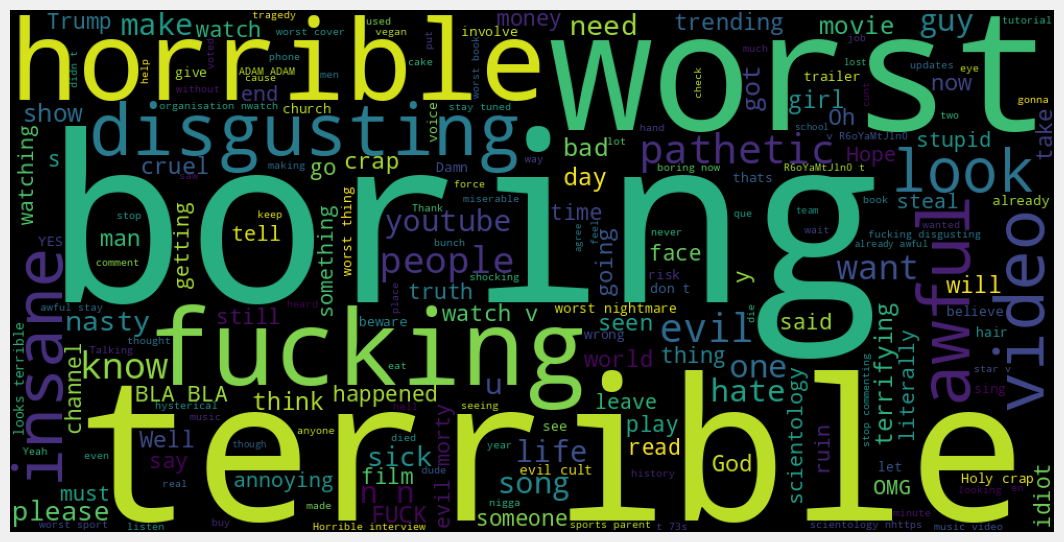

In [29]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [30]:
comments_negative=comments[comments['polarity']==-1]

In [31]:
comments_negative.shape

(3339, 5)

In [32]:
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
1387,ql0Op1VcELw,boring,0,0,-1.0
1394,ql0Op1VcELw,0:22 **laughs at terrible pun**,1,1,-1.0
1530,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0
1745,F2uJvwiSZAQ,People making jokes about 9/11 is truly disgus...,1,0,-1.0
1793,F2uJvwiSZAQ,Thats insane.,0,0,-1.0


In [33]:
total_comments=' '.join(comments_negative['comment_text'])

In [35]:
wordcloud=WordCloud(width=1000,height=500,stopwords=STOPWORDS).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

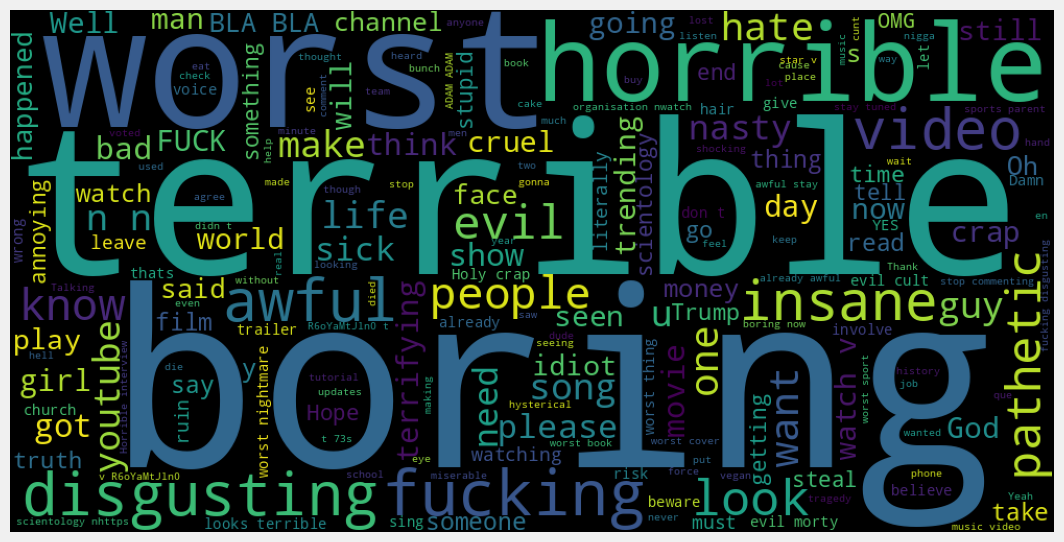

In [36]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

In [37]:
videos=pd.read_csv('../content/USvideos.csv.zip',error_bad_lines=False)

<ipython-input-37-d1cdb7505fa7>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  videos=pd.read_csv('../content/USvideos.csv.zip',error_bad_lines=False)
Skipping line 2401: expected 11 fields, saw 21
Skipping line 2800: expected 11 fields, saw 21
Skipping line 5297: expected 11 fields, saw 12
Skipping line 5299: expected 11 fields, saw 12
Skipping line 5300: expected 11 fields, saw 12
Skipping line 5301: expected 11 fields, saw 12



In [38]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [39]:
tags_complete=' '.join(videos['tags'])

In [40]:
import re

In [42]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags_complete)

(-0.5, 999.5, 499.5, -0.5)

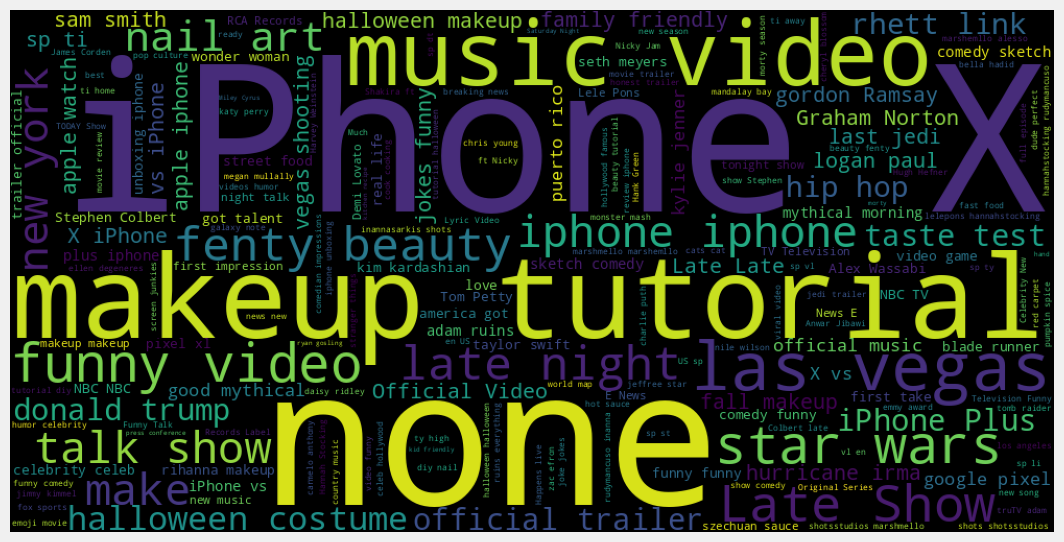

In [43]:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views & likes')

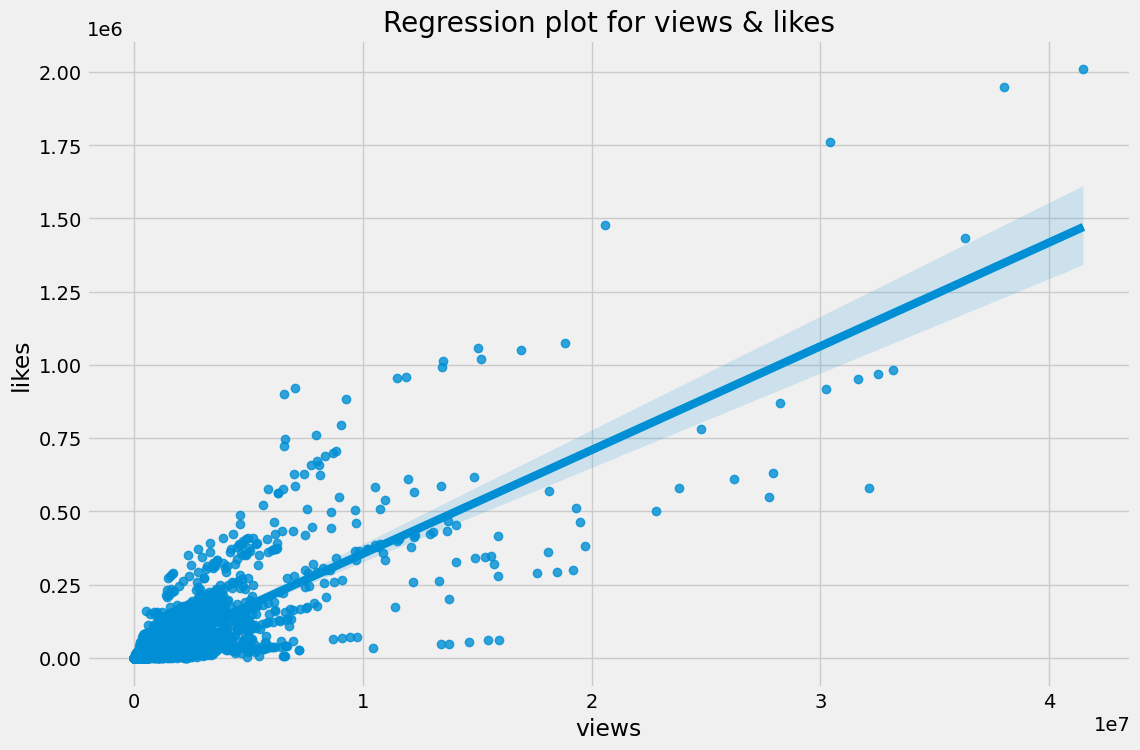

In [44]:
plt.figure(figsize=(12,8))
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views & likes')

Text(0.5, 1.0, 'Regression plot for views & dislikes')

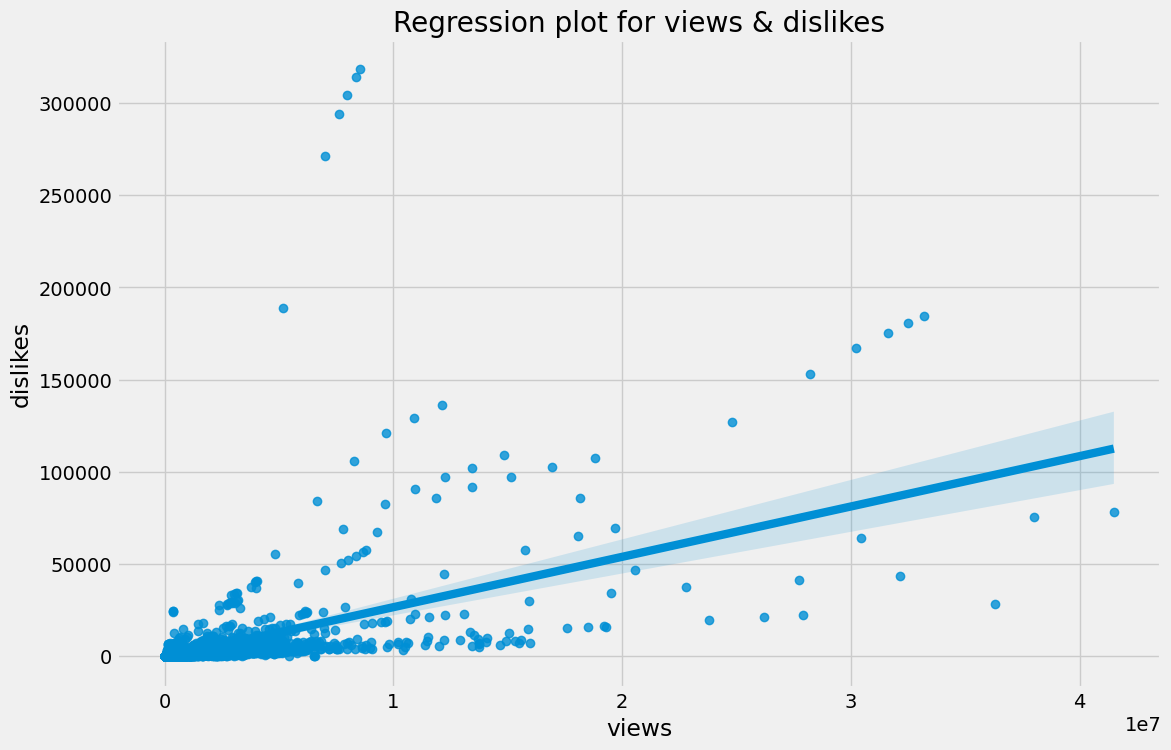

In [45]:
plt.figure(figsize=(12,8))
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views & dislikes')

In [46]:
df_corr=videos[['views','likes','dislikes']]

In [47]:
df_corr.corr()

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


<Axes: >

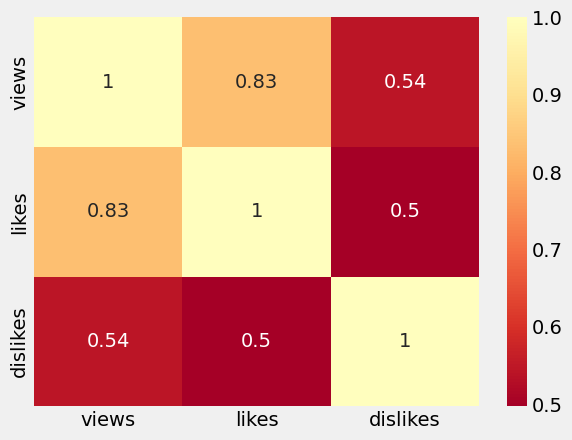

In [48]:
sns.heatmap(df_corr.corr(),center = True , annot=True,cmap="RdYlBu")

In [49]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [50]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'